In [45]:

import os
from collections import Counter
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

'''

I printed all Lean4 tactics with the following command:
```
import Mathlib
#help tactic
```
I pasted the output into the file called `tactics.txt`
This Python script reads the file and does a simple count of the tactics in Mathlib

By the way, there are also these commands:
```
import Mathlib

#help cats

#help tactic
#help conv -- seems to be the same as `#help tactic`
#help cat tactic

#help command
#help option
#help term
#help attribute
```

This file 


'''

'\n\nI printed all Lean4 tactics with the following command:\n```\nimport Mathlib\n#help tactic\n```\nI pasted the output into the file called `tactics.txt`\nThis Python script reads the file and does a simple count of the tactics in Mathlib\n\nBy the way, there are also these commands:\n```\nimport Mathlib\n\n#help cats\n\n#help tactic\n#help conv -- seems to be the same as `#help tactic`\n#help cat tactic\n\n#help command\n#help option\n#help term\n#help attribute\n```\n\nThis file \n\n\n'

In [46]:
'''
The format of #help tactic:

```
syntax "#check"... [Mathlib.Tactic.«tactic#check__»]
  The `#check t` tactic elaborates the term `t` and then pretty prints it with its type as `e : ty`.
  
  If `t` is an identifier, then it pretty prints a type declaration form
  for the global constant `t` instead.
  Use `#check (t)` to pretty print it as an elaborated expression.
  
  Like the `#check` command, the `#check` tactic allows stuck typeclass instance problems.
  These become metavariables in the output.

syntax "#find"... [Mathlib.Tactic.Find.«tactic#find_»]
```

The doc strings are indented by 2 spaces.

'''

lines = open('tactics.txt', 'r').read().split('\n')
tactics = [] # [[name, file, doc], [name, file, doc], ...]

# I feel like Python is safer than regex for this

for line in lines:
    if line.startswith('syntax'):
        if 'syntax ...' in line:
            name = ''
            print('prefix not found in line:', line)
        else:
            name = line.split('"')[1]
        file = line.split('... [')[1][:-1]
        doc = []
        tactics.append([name, file, doc])
    elif line.startswith('  '):
        tactics[-1][2].append(line[2:])
    elif line == '':
        # Note that, 
        # The empty lines with idnentation ('  ') belong to the previous branch
        # The entire empty lines between blocks ('') are here. They are ignored.
        pass 
    else:
        raise Exception('Unexpected line: ' + line)

# remove tactics without names. join the doc strings
tactics = [[name, file, '\n'.join(doc)] for name, file, doc in tactics if name != '']


prefix not found in line: syntax ... [Lean.Parser.Tactic.nestedTactic]
prefix not found in line: syntax ... [Lean.Parser.Tactic.unknown]
prefix not found in line: syntax ... [Lean.cdot]


In [47]:
counter = Counter()

'''
walk through .lean files in ../../.lake/packages/mathlib,
simply split by spaces and line breaks, and count the tactics 
'''

for root, dirs, files in os.walk('../../.lake/packages/mathlib'):
    for file in files:
        if not file.endswith('.lean'):
            continue
        tokens = open(os.path.join(root, file), 'r').read().split()
        counter.update(tokens)
        

In [48]:
counter

Counter({':': 579928,
         ':=': 267821,
         '#align': 131176,
         'a': 124804,
         '_': 121922,
         '=': 115035,
         'by': 108439,
         'theorem': 105565,
         'x': 94597,
         'f': 86512,
         'the': 83302,
         '=>': 81288,
         '→': 66425,
         'of': 64711,
         '-/': 62020,
         'rw': 57452,
         'fun': 54338,
         '*': 53128,
         'is': 52733,
         '/--': 48453,
         'n': 43675,
         'simp': 42065,
         's': 41977,
         'i': 41181,
         'b': 39514,
         '·': 39284,
         'α': 38605,
         'h': 38080,
         '∈': 37612,
         'exact': 37045,
         '+': 35359,
         'R': 35293,
         '(f': 35128,
         'in': 34806,
         'to': 32592,
         '≤': 32313,
         'y': 30056,
         '0': 29858,
         'with': 29697,
         '∀': 28882,
         'and': 28305,
         'only': 27732,
         '@[simp]': 27642,
         'g': 27296,
         'p': 27136,

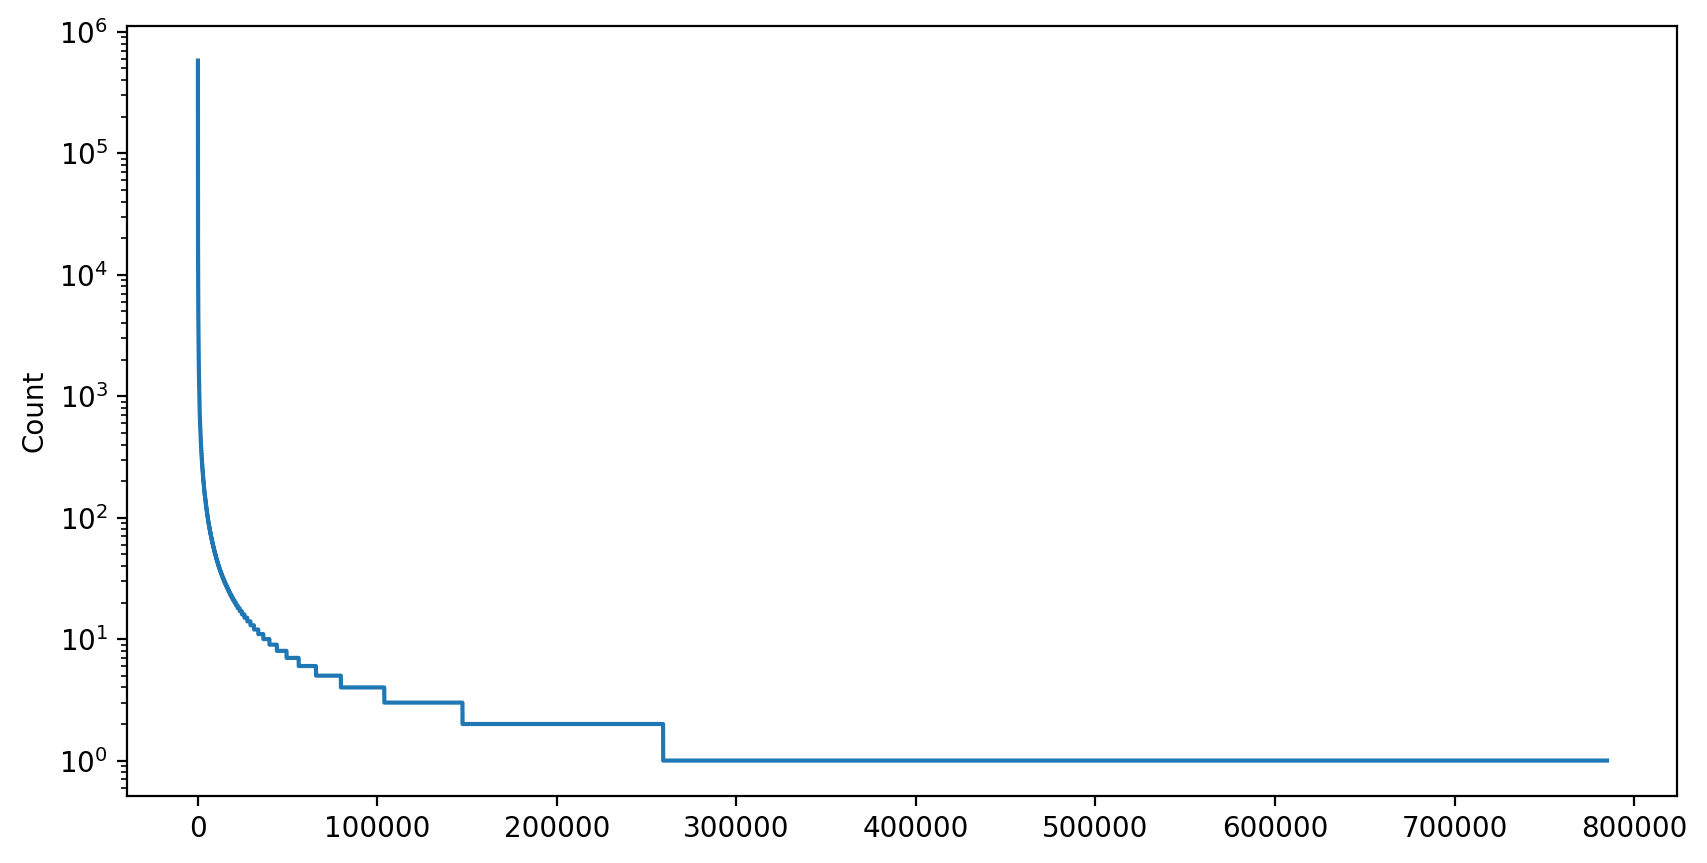

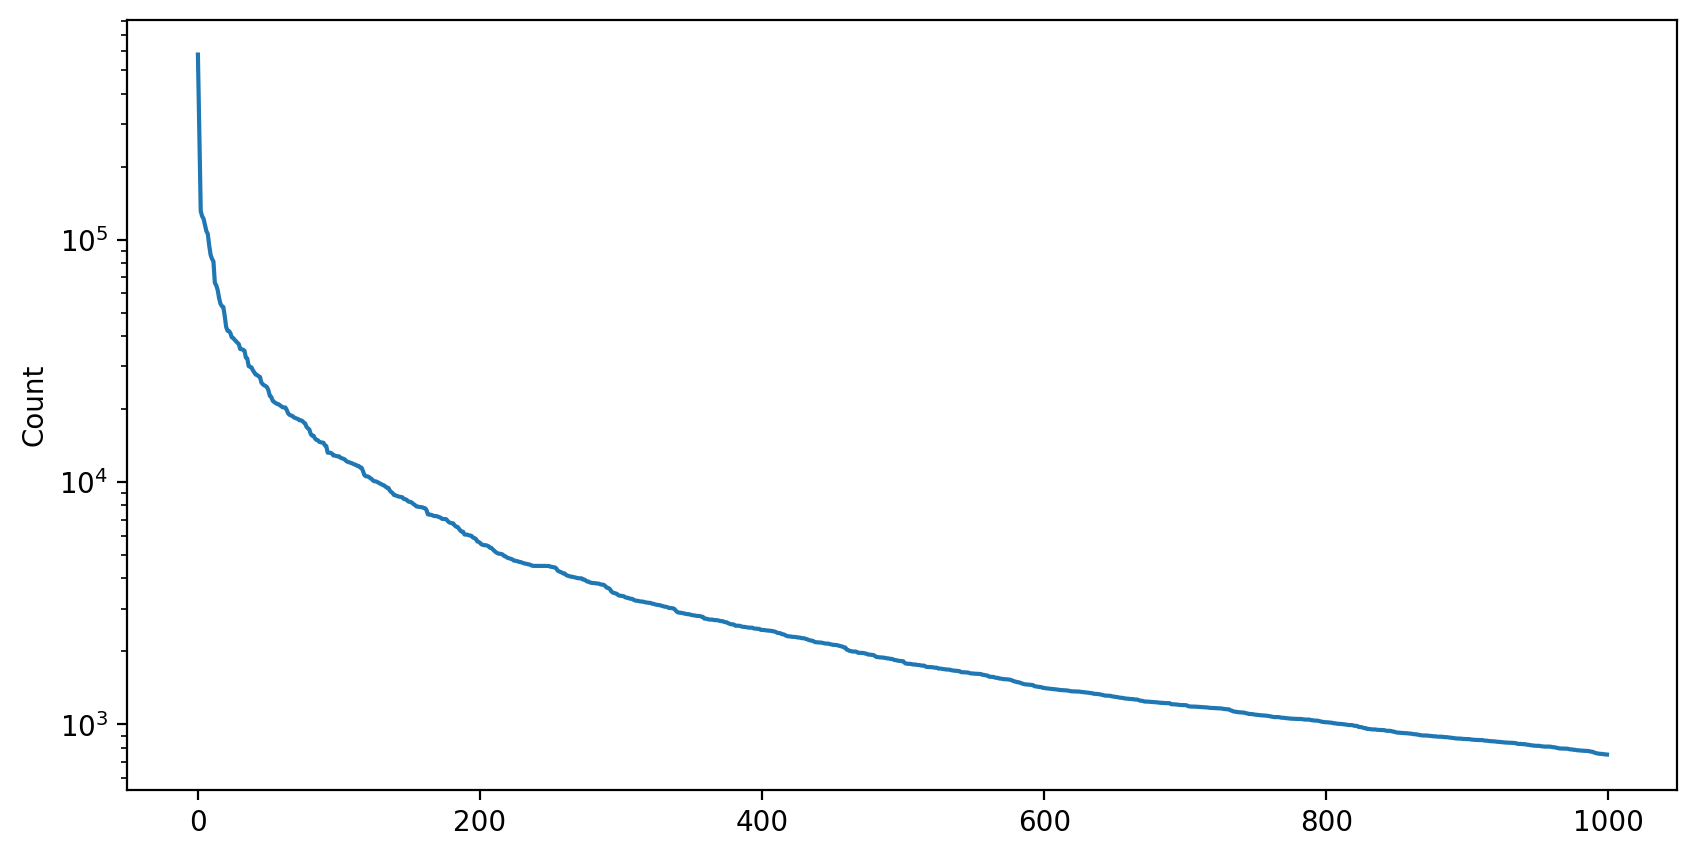

In [49]:
# plot the sorted counts
plt.figure(figsize=(10, 5))
plt.plot(sorted(counter.values(), reverse=True))
plt.yscale('log')
plt.ylabel('Count')
plt.show()

# plot the sorted counts, without the long tail
plt.figure(figsize=(10, 5))
plt.plot(sorted(counter.values(), reverse=True)[:1000])
plt.yscale('log')
plt.ylabel('Count')
plt.show()

In [50]:
# We were plotting all tokens. Now let's plot only the tactics

tactic_counts = Counter()
for name, file, doc in tactics:
    tactic_counts[name] = counter[name]
tactic_counts



Counter({'_': 121922,
         'rw': 57452,
         'simp': 42065,
         'exact': 37045,
         'rfl': 25729,
         'have': 25041,
         'refine': 16468,
         'apply': 14067,
         'let': 12765,
         'intro': 10687,
         'open': 10155,
         'simpa': 8322,
         'ext': 8283,
         'obtain': 7819,
         'rintro': 6623,
         '<;>': 6545,
         'set': 6237,
         'rcases': 6028,
         'simp_rw': 5533,
         'dsimp': 4699,
         'set_option': 4313,
         'use': 4007,
         'cases': 3922,
         'rwa': 3545,
         'ring': 3332,
         'else': 3237,
         'show': 3236,
         'convert': 3172,
         'by_cases': 3071,
         'constructor': 2904,
         'calc': 2434,
         'suffices': 2307,
         'group': 2299,
         'congr': 2252,
         'haveI': 2183,
         "cases'": 2007,
         'change': 1973,
         'erw': 1934,
         'left': 1898,
         'right': 1780,
         "induction'": 1723,
   

number of tactics: 471


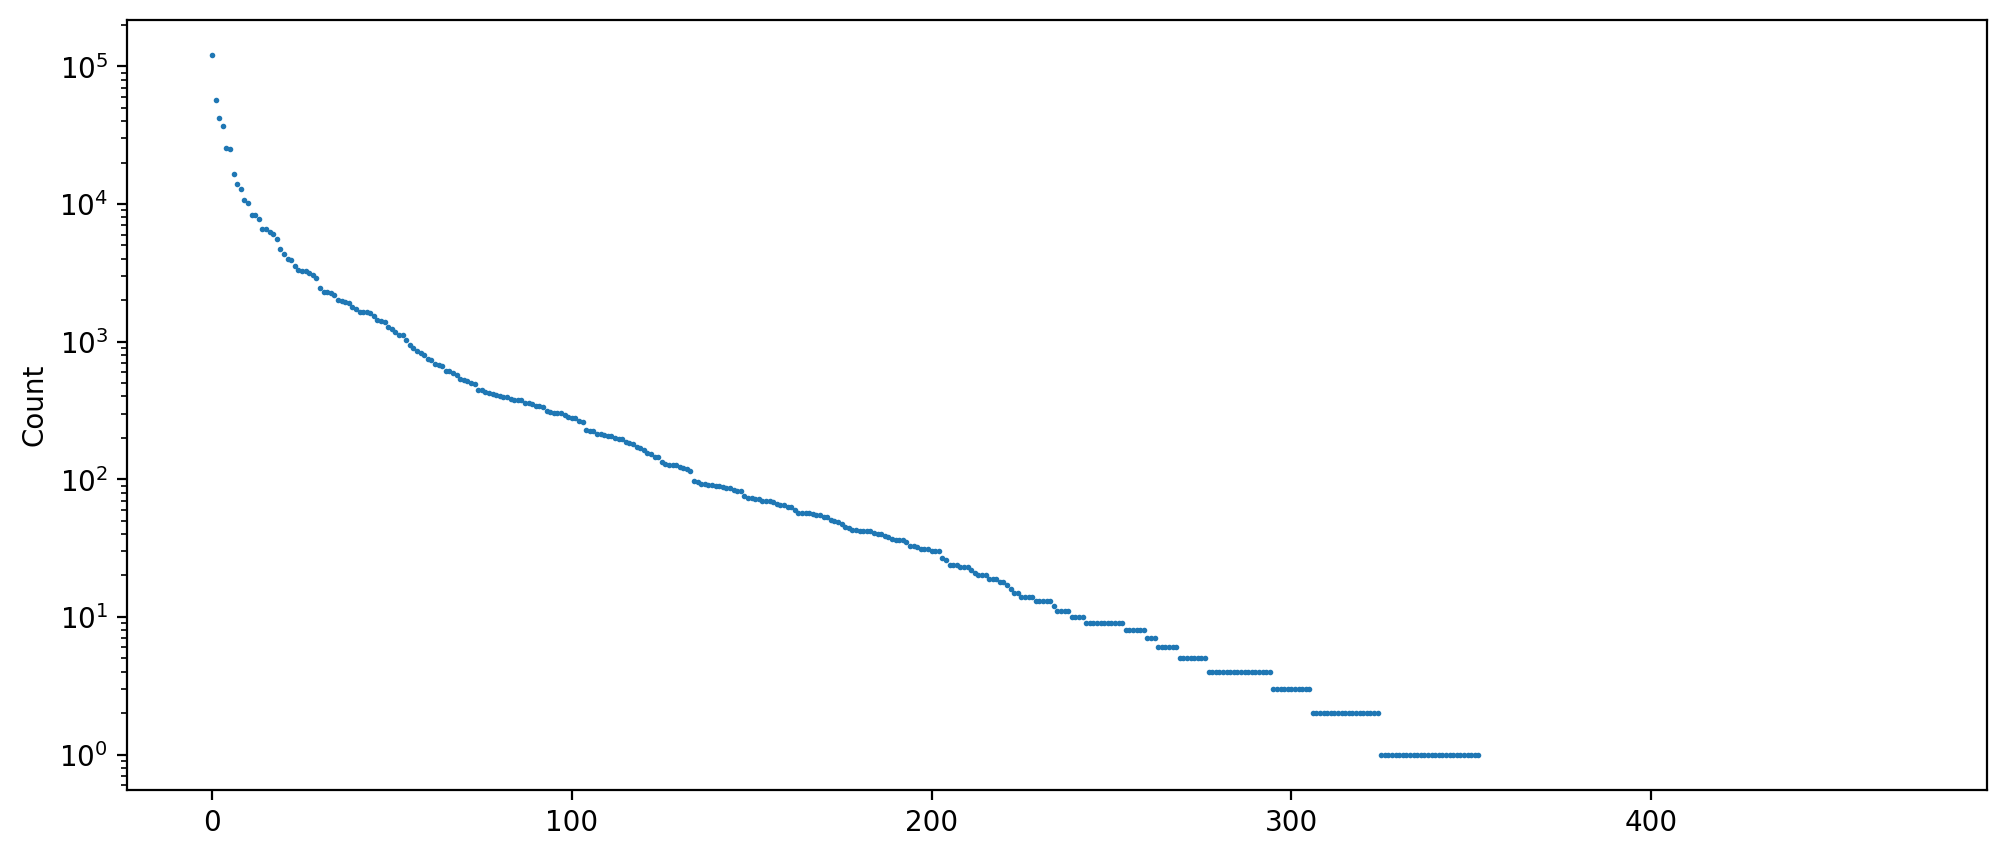

In [51]:

print('number of tactics:', len(tactic_counts))

plt.figure(figsize=(12, 5))
plt.scatter(
    x=range(len(tactic_counts)),
    y=sorted(tactic_counts.values(), reverse=True),
    s=1
)
plt.yscale('log')
plt.ylabel('Count')
plt.show()

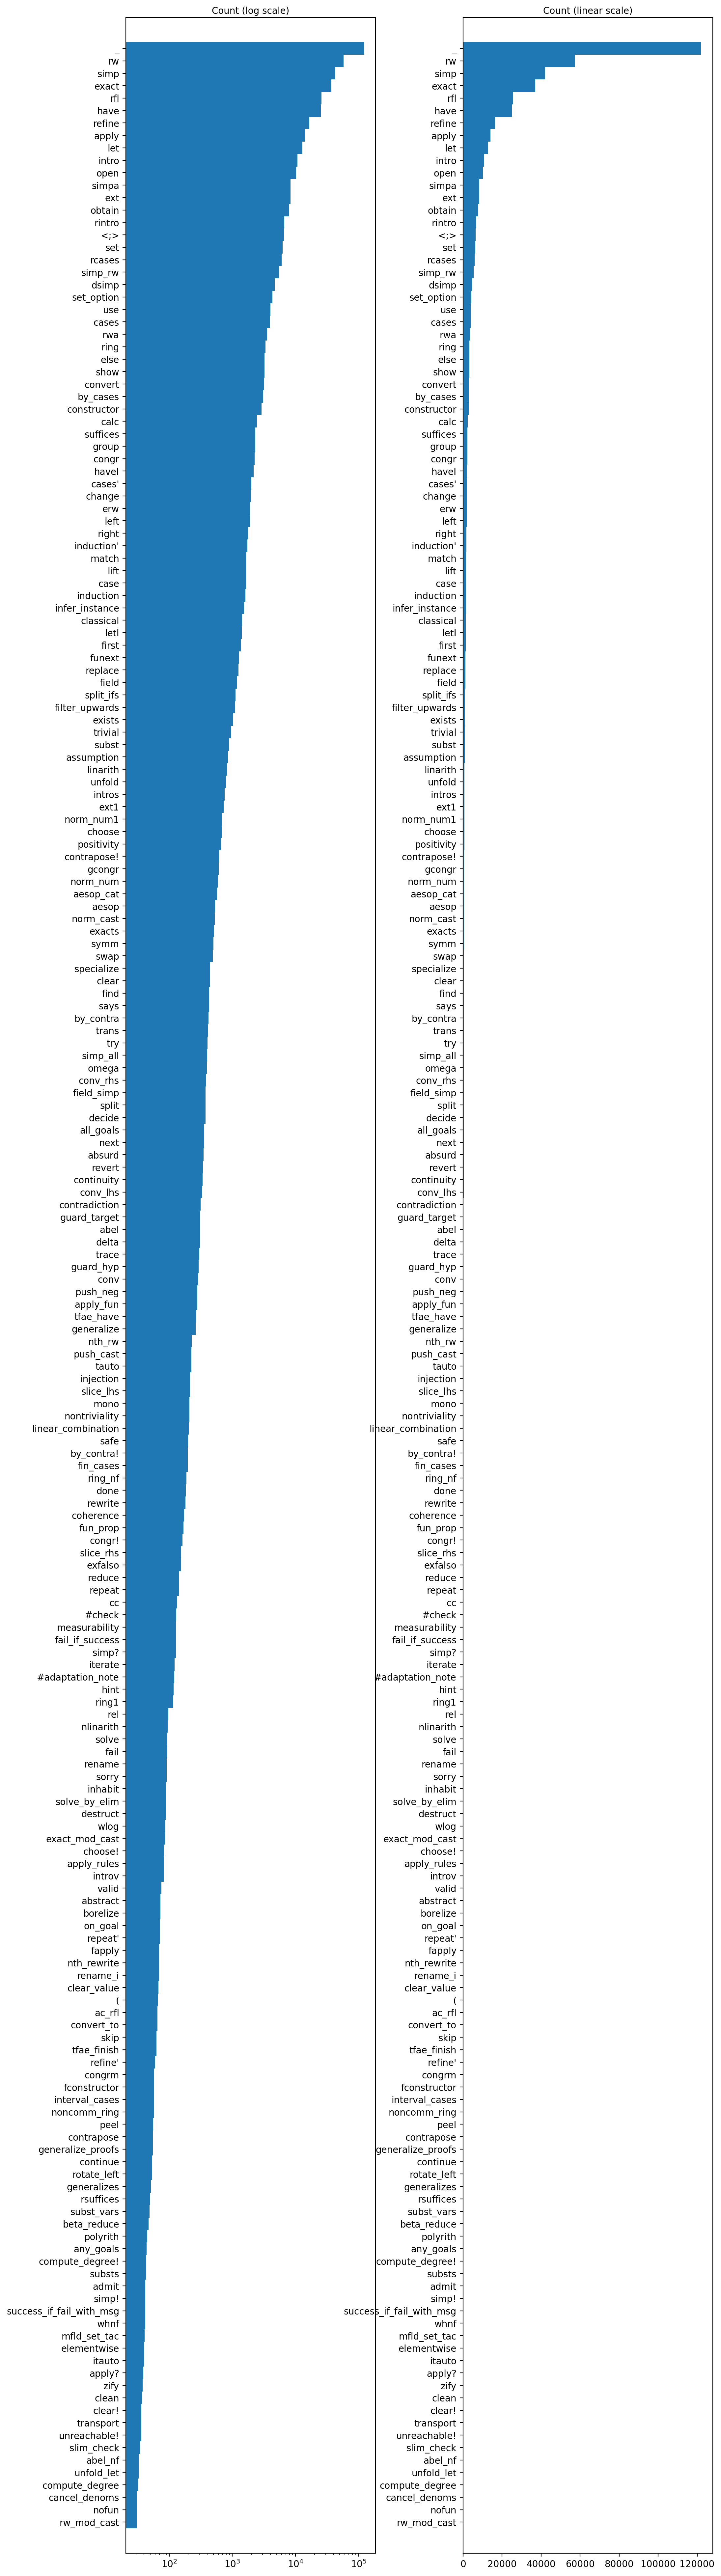

['abel!',
 'abel_nf!',
 'aesop_cat?',
 'aesop_cat_nonterminal',
 'aesop_graph?',
 'aesop_graph_nonterminal',
 'aesop_unfold',
 'and_intros',
 'apply_ext_theorem',
 'apply_field',
 'apply_rfl',
 'arith_mult?',
 'array_get_dec',
 'array_mem_dec',
 'async',
 'bddDefault',
 'bv_omega',
 "cases''",
 'cfc_cont_tac',
 'cfc_tac',
 'cfc_zero_tac',
 'clarify',
 'classical!',
 'compute_degree_le',
 'congrm?',
 'continuity?',
 'conv?',
 'decreasing_trivial_pre_omega',
 'decreasing_with',
 'derive_elementwise_proof',
 'derive_reassoc_proof',
 'dsimp!',
 'dsimp?',
 'dsimp?!',
 'dsimp_result',
 'eapply',
 'elementwise!',
 'equiv_rw',
 'equiv_rw_type',
 'ext1?',
 'extract_goal!',
 'fail_if_success?',
 'false_or_by_contra',
 'field_simp_discharge',
 'gcongr?',
 'gcongr_discharger',
 "generalize'",
 'get_elem_tactic',
 'get_elem_tactic_trivial',
 'guard_expr',
 'guard_proof_term',
 'guard_tags',
 'h_generalize',
 'h_generalize!',
 'have!?',
 "have'",
 'have_field',
 'html!',
 "induction''",
 'injections

In [52]:

tactic_count_lst = sorted(
    tactic_counts.items(),
    key=lambda x: x[1],
    reverse=True
)

top = tactic_count_lst[:200][::-1]

plt.figure(figsize=(11.5, 50))

# left side, x-log version
ax = plt.subplot(1, 2, 1)
plt.barh(
    y=[name for name, count in top],
    width=[count for name, count in top],
    height=1,
)
plt.margins(y=0.01)
plt.xscale('log')
plt.xlabel('Count (log scale)')
ax.xaxis.set_label_position('top')

# right side, x-linear version
ax = plt.subplot(1, 2, 2)
plt.barh(
    y=[name for name, count in top],
    width=[count for name, count in top],
    height=1,
)
plt.margins(y=0.01)
plt.xscale('linear')
plt.xlabel('Count (linear scale)')
ax.xaxis.set_label_position('top')

# increase the space between the two plots
plt.subplots_adjust(wspace=0.35)

plt.show()

# also list all tactics with 0 usage
unused_tactics = [name for name, count in tactic_counts.items() if count == 0]
unused_tactics


In [67]:
# write a tactics.md file, sorted by count, adding the count information

with open('README.md', 'w') as f:
    # f.write('# Mathlib Tactics\n\n')
    # f.write('This file lists all Mathlib tactics, sorted by usage count.\n\n')
    # f.write('The count information is based on a simple token count in the Mathlib repository.\n\n')
    # f.write('The tactics with 0 usage are listed at the end.\n\n')
    # f.write('The tactics are listed in the format `name (count) - doc`\n\n')
    # f.write('---\n\n')
    # f.write('## Tactics used at least once\n\n')
    f.write(
'''
# Mathlib Tactics

This file lists all tactics defined in Mathlib and Lean, sorted by usage count.

I found this command that can print all tactic names and docstrings currently imported.

```
import Mathlib
#help tactic
```

I then copy-pasted the output into a file called `tactics.txt`
and processed it with the python script in `sort.ipynb`.

`sort.ipynb` reads all `.lean` files in ./lake/packages/mathlib ,
splits the text by spaces and line breaks, and counts the tactics.
It then sorts the tactics by usage count, visualizes the counts,
and writes a `README.md` markdown file.

## Tactics used at least once
'''.strip())
    f.write('\n\n')

    tactic_doc_dict = {name: [file, doc] for name, file, doc in tactics}
    for i, [name, count] in enumerate(tactic_count_lst):
        if count == 0 and tactic_count_lst[i - 1][1] != 0:
            f.write('## Unused Tactics\n\n')
        file, doc = tactic_doc_dict[name]
        # f.write(f'### {i+1}. {name}\n')
        # f.write(f'[Occurrences: {count}]\n')
        # f.write(f'\n{doc}\n\n')
        # f.write('---\n\n')
        f.write(
f'''
### {i+1}. {name}

> Occurrences: {count}
> 
> `import {file}`

{doc}

---
'''.strip())
        f.write('\n\n')
    